# Trial

Essential libraries

In [211]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [212]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



# Initial Plots of N, Z, A to Binding Energies

Binding Energies against Number of Protons

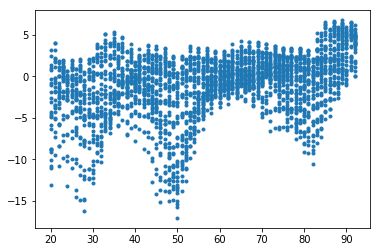

In [213]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Neutrons

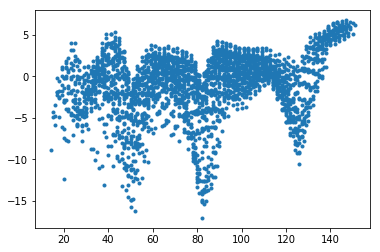

In [214]:
plt.plot(N,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Atomic Number

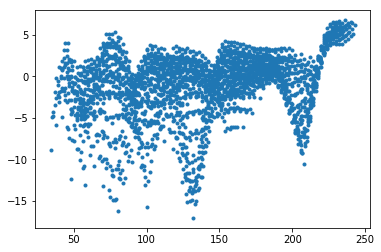

In [215]:
plt.plot(A,y,'o',markersize=3)
plt.show()

N vs Z with Binding Energies indicated in color

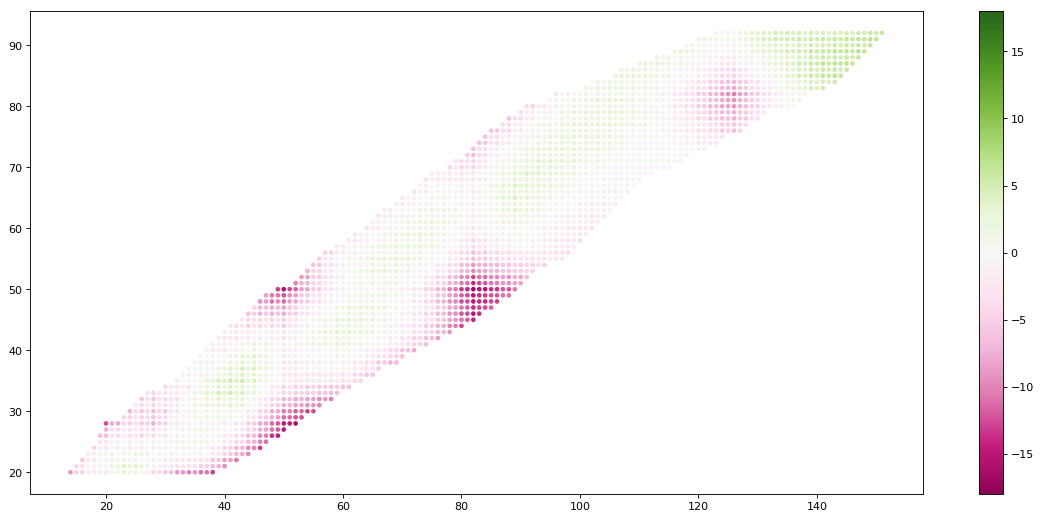

In [216]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

Splitting test data set into train and test est

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score

print('shape of training set', Xs_train.shape)
print('shape of testing set', Xs_test.shape)



shape of training set (2021, 2)
shape of testing set (674, 2)


# Making rf the Random Forest object

Using Scaling innitially

In [221]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);


In [222]:
predictions=rf.predict(Xs_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
Etrain1=round(np.mean(errors), 5)


predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5), '\n\n' )
Etest1=round(np.mean(errors), 5)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(Xs_train, y_train)
testscore1=rf.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Mean Absolute Error for train data: 0.22694
Mean Absolute Error for test data: 0.60803 


The coefficient of determination for training:  0.9943589771896261
The coefficient of determination for testing:  0.9609424794413894
score difference:  0.03341649774823663


In [223]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

feature_list='N', 'Z'

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: N                    Importance: 0.54
Variable: Z                    Importance: 0.46


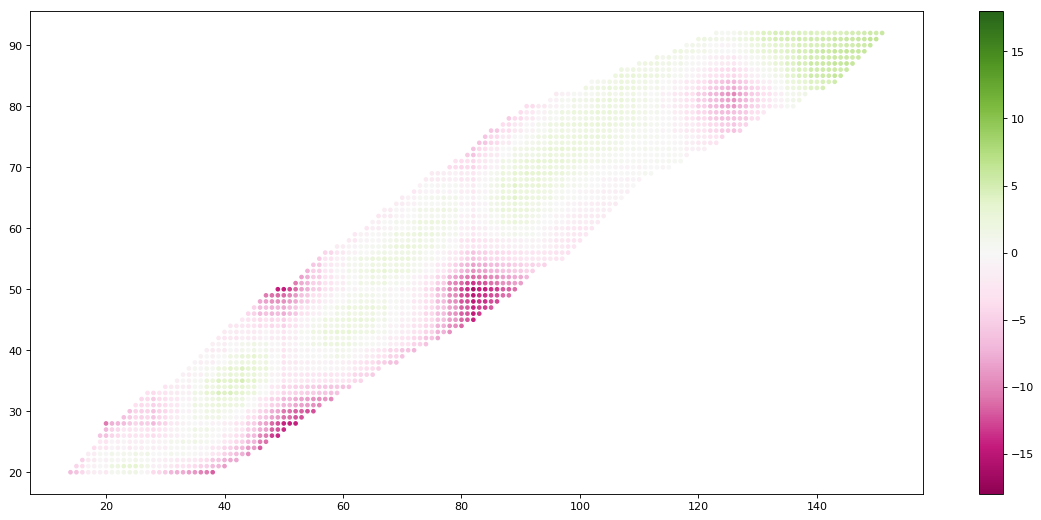

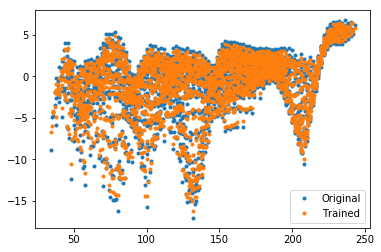

In [224]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers as a feature




In [225]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [226]:
# Instantiate model 
rf.fit(Xs_train, y_train);

In [243]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Mean Absolute Error for Xs_test data:', Etest1)
print('Error difference: ', Etest1-Etrain1, "\n")


predictions=rf.predict(Xs_train)
errors = abs(predictions- y_train)
Etrain2=round(np.mean(errors),5)

predictions=rf.predict(Xs_test)
errors = abs(predictions - y_test)
Etest2=round(np.mean(errors),5)


print('With magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data', Etrain2 )
print('Mean Absolute Error for Xs_test data:', Etest2)
print('Error difference: ', Etest2-Etrain2, '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

print('===================================================')
print('Improvement of the train error:', imprtrain)
print('Improvement of the test error:', imprtest)
print('===================================================', '\n\n\n')

trainscore2=rf.score(Xs_train, y_train)
testscore2=rf.score(Xs_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Improvement of the train score:', imprtrainscore)
print('Improvement of the test score:', imprtestscore)
print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.22694
Mean Absolute Error for Xs_test data: 0.60803
Error difference:  0.38108999999999993 

With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.27614
Mean Absolute Error for Xs_test data: 0.75283
Error difference:  0.47669 



Improvement of the train error: 0.049199999999999994
Improvement of the test error: 0.14480000000000004



Without magic numbers as a feature:
The coefficient of determination for training:  0.9943589771896261
The coefficient of determination for testing:  0.9609424794413894
score difference:  0.03341649774823663 

With magic numbers as a feature:
The coefficient of determination for training:  0.9917235345018097
The coefficient of determination for testing:  0.937696419779085
score difference:  0.0540271147227247 



Improvement of the train score: -0.0026354426878163473
Improvement of the test score: -0.02324605966230442





# Feature Importance

In [242]:
# Get numerical feature importances
#importances = list(rf.feature_importances_)

#ask about the magic Numbers
#2, 8, 20, 28, 50, 82 and 126.
#feature_list='N', 'Z', '20', '28', '50', '80', '126',


# List of tuples with variable and importance
#feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


#np.stack((
#1          N, 
#2          Z, 
#3          N+Z, 
#4          N-Z, 
#5          np.exp(-(20-N)**2/20.), 
#6          np.exp(-(20-Z)**2/20.), 
#7          np.exp(-(28-N)**2/20.), 
#8          np.exp(-(28-Z)**2/20.),
#9          np.exp(-(50-N)**2/20.),
#10          np.exp(-(50-Z)**2/20.),
#11        np.exp(-(80-N)**2/20.),
#12          np.exp(-(80-Z)**2/20.),
#13          np.exp(-(126-N)**2/20.),
#14          np.exp(-(126-Z)**2/20.)))

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


N: 0.10745453293106237
Z: 0.13737775919828255 

N+Z: 0.16042848240664567
N-Z: 0.3121430001299469 

20-N: 0.0038314033085605358
20-Z: 0.028657332569938326 

28-N: 0.006348920738365456
28-Z: 0.026044145860647475 

50-N: 0.04926175598289958
50-Z: 0.07141348027190283 

80-N: 0.0255358948764536
80-Z: 0.027066750297934206 

126-N: 0.04348779040211173
126-Z: 0.0009487510252490411 



array([0.10745453, 0.13737776, 0.16042848, 0.312143  , 0.0038314 ,
       0.02865733, 0.00634892, 0.02604415, 0.04926176, 0.07141348,
       0.02553589, 0.02706675, 0.04348779, 0.00094875])

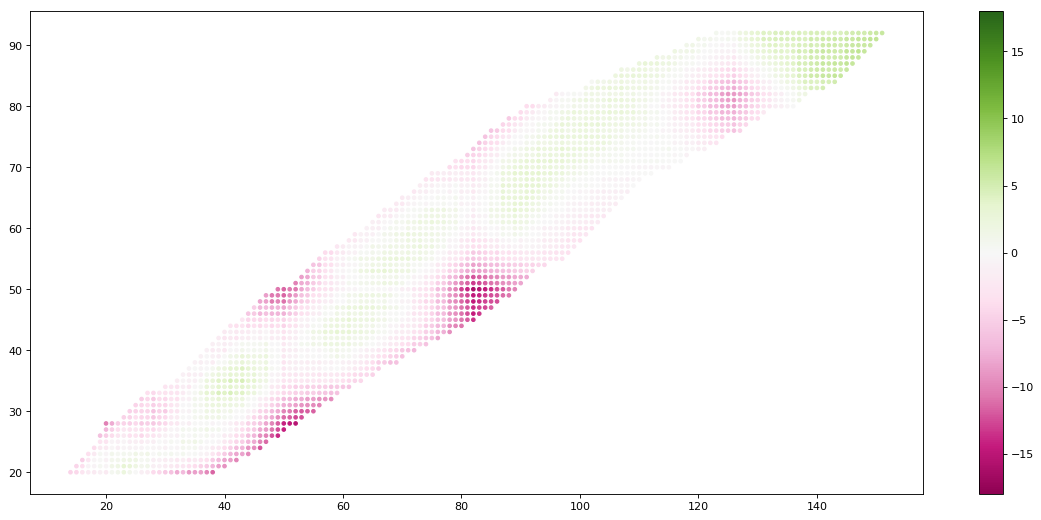

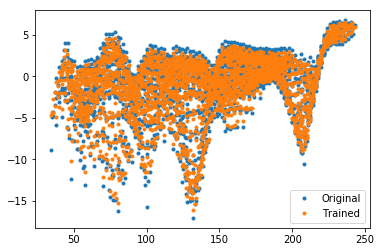

In [229]:
#Have to refit rf with all of X and y 
#Unlike with scaling

Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()



# Random Forest without Scaling 

Innitially without magic Numbers as Features.

In [188]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [176]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf.fit(X_train, y_train);


In [177]:
predictions=rf.predict(X_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
Etrain1=round(np.mean(errors), 5)


predictions=rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5), '\n\n' )
Etest1=round(np.mean(errors), 5)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(X_train, y_train)
testscore1=rf.score(X_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Mean Absolute Error for train data: 0.22697
Mean Absolute Error for test data: 0.64732 


The coefficient of determination for training:  0.9946483034469947
The coefficient of determination for testing:  0.9532409156464888
score difference:  0.0414073878005059


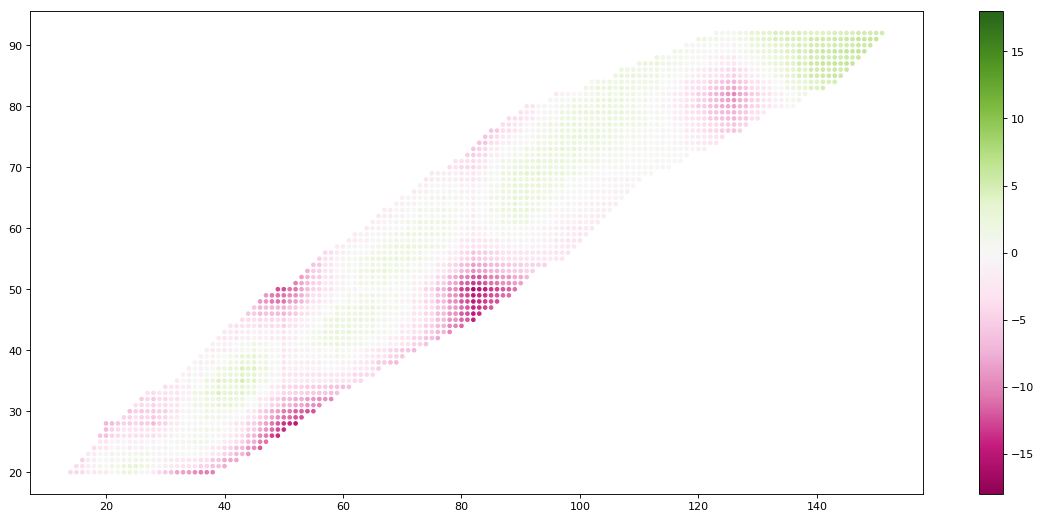

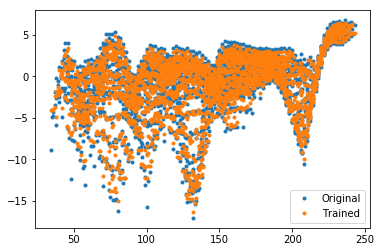

In [178]:

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()


# adding magic numbers as a feature

still without scaling


In [179]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [180]:
# Instantiate model 
rf.fit(X_train, y_train);

In [183]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Mean Absolute Error for Xs_test data:', Etest1)
print('Error difference: ', Etest1-Etrain1, "\n")


predictions=rf.predict(X_train)
errors = abs(predictions- y_train)
Etrain2=round(np.mean(errors),5)

predictions=rf.predict(X_test)
errors = abs(predictions - y_test)
Etest2=round(np.mean(errors),5)


print('With magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data', Etrain2 )
print('Mean Absolute Error for Xs_test data:', Etest2)
print('Error difference: ', Etest2-Etrain2, '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

print('===================================================')
print('Improvement of the train error:', imprtrain)
print('Improvement of the test error:', imprtest)
print('===================================================', '\n\n\n')

trainscore2=rf.score(X_train, y_train)
testscore2=rf.score(X_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Improvement of the train score:', imprtrainscore)
print('Improvement of the test score:', imprtestscore)
print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.22697
Mean Absolute Error for Xs_test data: 0.64732
Error difference:  0.42035 

With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.27157
Mean Absolute Error for Xs_test data: 0.80465
Error difference:  0.53308 



Improvement of the train error: 0.04459999999999997
Improvement of the test error: 0.15732999999999997



Without magic numbers as a feature:
The coefficient of determination for training:  0.9946483034469947
The coefficient of determination for testing:  0.9532409156464888
score difference:  0.0414073878005059 

With magic numbers as a feature:
The coefficient of determination for training:  0.9919797330201284
The coefficient of determination for testing:  0.9279036540628797
score difference:  0.06407607895724876 



Improvement of the train score: -0.0026685704268663013
Improvement of the test score: -0.02533726158360916





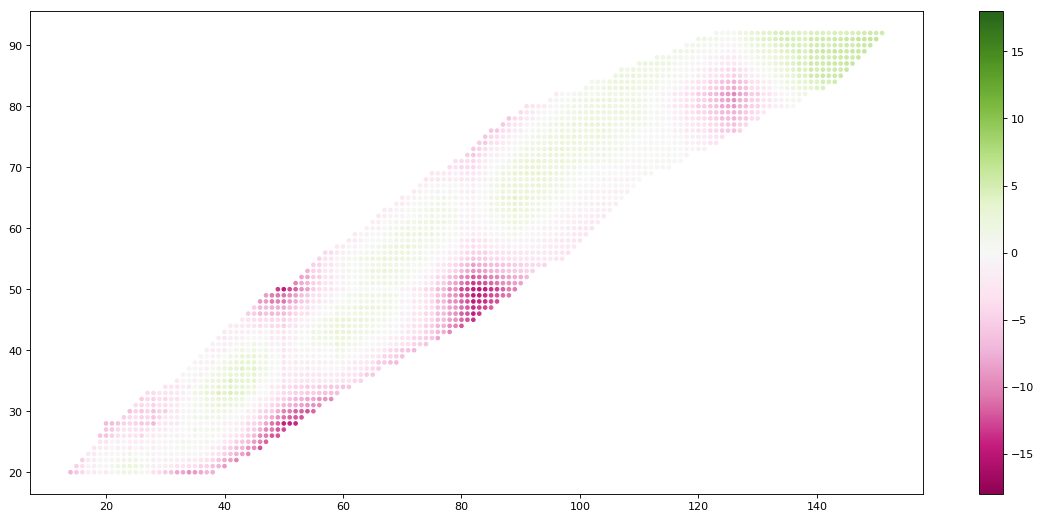

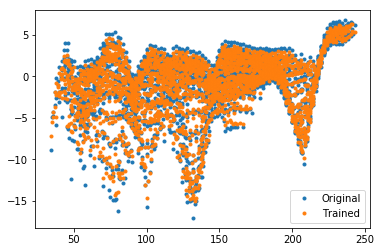

In [184]:
#Have to refit rf with all of X and y 
#Unlike with scaling

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()



# Evaluating RF parameters

In [186]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [189]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)